In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter, defaultdict
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm



import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [2]:
df1 = pd.read_csv(r"D:\T24\MAFL\Yeasin's Model\Dataset\Recent_UpdatedNB15.csv")
print(f"Dataset Shape: {df1.shape}")
display(df1.head(3))
display(df1.tail(3))

Dataset Shape: (257673, 44)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat
0,1.833334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.030121,0.0,0.0,0.0,1.303758e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.0,0.016129,0.333333,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.016393,False,False,0
1,1.333334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.147128,0.0,0.0,0.0,9.481877e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579054,0.0,0.0,0.0,0.016129,0.333333,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.016393,False,False,0
2,8.333335e-08,0.901515,0.0,0.5,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.142685,0.0,0.0,0.0,5.926172e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344595,0.0,0.0,0.0,0.032258,0.333333,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.032787,False,False,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat
257670,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.0,0.000006,0.0,0.111111,0.996078,0.0,0.008461,0.0,0.0,0.0,1.066711e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022297,0.0,0.0,0.0,0.177419,0.333333,0.034483,0.034483,0.044444,0.187500,0.0,0.0,0.0,0.033898,0.180328,False,True,1
257671,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.0,0.000006,0.0,0.111111,0.996078,0.0,0.008461,0.0,0.0,0.0,1.066711e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022297,0.0,0.0,0.0,0.467742,0.333333,0.500000,0.500000,0.288889,0.453125,0.0,0.0,0.0,0.491525,0.475410,False,True,1
257672,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.0,0.000006,0.0,0.111111,0.996078,0.0,0.008461,0.0,0.0,0.0,1.066711e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022297,0.0,0.0,0.0,0.467742,0.333333,0.500000,0.500000,0.333333,0.453125,0.0,0.0,0.0,0.491525,0.475410,False,True,1


In [3]:
le_city = LabelEncoder()
df1['is_sm_ips_ports'] = le_city.fit_transform(df1['is_sm_ips_ports'])
df1['label'] = le_city.fit_transform(df1['label'])

In [4]:
display(df1.head(1))

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat
0,1.833334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.030121,0.0,0.0,0.0,1.303758e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.0,0.016129,0.333333,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.016393,0,0,0


In [5]:
X = df1.drop(columns=["label", "attack_cat"])
y = df1["label"]
y_att = df1["attack_cat"]

In [6]:
X_train, X_test, y_train, y_test, attack_train, attack_test = train_test_split(X, y, y_att, test_size=0.2, stratify=y, random_state=42)

X_binned = X.apply(lambda col: pd.qcut(col, q=3, labels=False, duplicates='drop'))
X_binned_tensor = torch.tensor(X_binned.values, dtype=torch.long)


In [7]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

def comprehensive_chi2_selection(X_train, y_train, n_features=20, n_bins=10):
    results = []

    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    X_binned = pd.DataFrame(
        discretizer.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )

    for col in X_binned.columns:

        contingency = pd.crosstab(X_binned[col], y_train)


        chi2, p_value, dof, expected = chi2_contingency(contingency)

        n = contingency.sum().sum()
        min_dim = min(contingency.shape[0], contingency.shape[1]) - 1
        cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

        results.append({
            'feature': col,
            'chi2': chi2,
            'p_value': p_value,
            'cramers_v': cramers_v,
            'dof': dof,
            'n_bins_used': contingency.shape[0]
        })


    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('chi2', ascending=False)

    display(results_df)
    print("\nChi-Square Feature Selection Results:")
    print("-" * 80)
    print(f"{'Feature':<25} {'Chi2':>12} {'P-value':>12} {'Cramér V':>10} {'DoF':>5}")
    print("-" * 80)

    for idx, row in results_df.head(n_features).iterrows():
        print(f"{row['feature']:<25} {row['chi2']:>12.3f} {row['p_value']:>12.3e} "
              f"{row['cramers_v']:>10.3f} {row['dof']:>5}")

    for idx, row in results_df.iterrows():
        if row['p_value'] > 0.05:
            print(f" {row['feature']} has p-value > 0.05 (not statistically significant)")


    top_features = results_df.head(n_features)['feature'].tolist()

    return top_features, results_df, discretizer


top_features, chi2_results, discretizer = comprehensive_chi2_selection(
    X_train, y_train, n_features=20
)


,feature,chi2,p_value,cramers_v,dof,n_bins_used
9,sttl,110753.767423,0.0,0.732994,3,4
10,dttl,104781.207229,0.0,0.712956,2,3
31,ct_state_ttl,103403.281855,0.0,0.708253,2,3
8,rate,81145.750467,0.0,0.627414,9,10
11,sload,76153.052882,0.0,0.607806,9,10
5,dpkts,74535.093477,0.0,0.601314,5,6
12,dload,73331.698530,0.0,0.596440,5,6
16,dinpkt,70232.519057,0.0,0.583701,5,6
0,dur,69635.672255,0.0,0.581215,9,10
26,smean,67629.468199,0.0,0.572781,8,9



Chi-Square Feature Selection Results:
--------------------------------------------------------------------------------
Feature                           Chi2      P-value   Cramér V   DoF
--------------------------------------------------------------------------------
sttl                        110753.767    0.000e+00      0.733     3
dttl                        104781.207    0.000e+00      0.713     2
ct_state_ttl                103403.282    0.000e+00      0.708     2
rate                         81145.750    0.000e+00      0.627     9
sload                        76153.053    0.000e+00      0.608     9
dpkts                        74535.093    0.000e+00      0.601     5
dload                        73331.699    0.000e+00      0.596     5
dinpkt                       70232.519    0.000e+00      0.584     5
dur                          69635.672    0.000e+00      0.581     9
smean                        67629.468    0.000e+00      0.573     8
state                        60360.479  

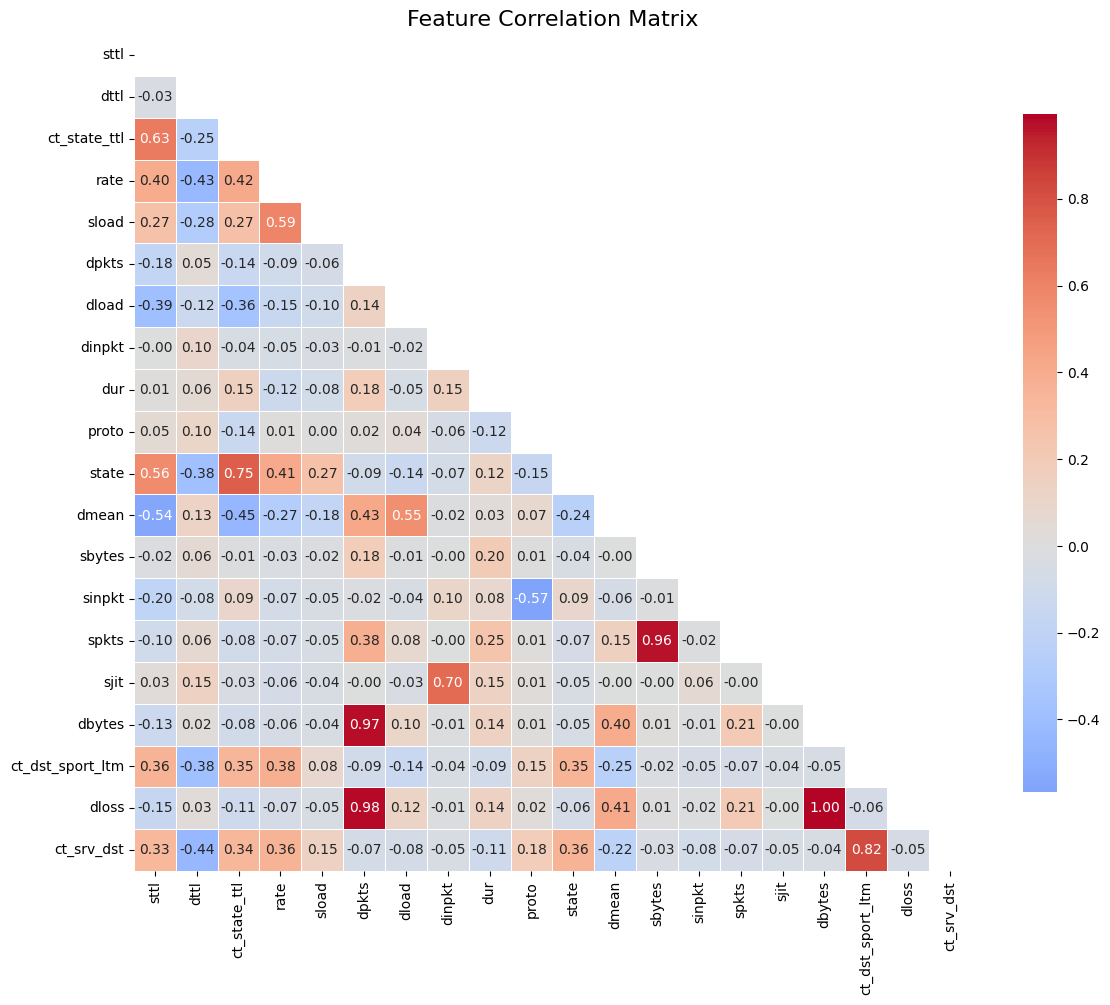

In [8]:
selected_features = ['sttl', 'dttl', 'ct_state_ttl', 'rate', 'sload', 'dpkts',
                    'dload', 'dinpkt', 'dur', 'proto', 'state', 'dmean',
                    'sbytes', 'sinpkt', 'spkts', 'sjit', 'dbytes',
                    'ct_dst_sport_ltm', 'dloss', 'ct_srv_dst']


X_selected = X_train[selected_features]


correlation_matrix = X_selected.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
original_features = ['sttl', 'dttl', 'ct_state_ttl', 'rate', 'sload', 'dpkts',
                    'dload', 'dinpkt', 'dur', 'proto', 'state', 'dmean',
                    'sbytes', 'sinpkt', 'spkts', 'sjit', 'dbytes',
                    'ct_dst_sport_ltm', 'dloss', 'ct_srv_dst']

features_to_remove = ['spkts', 'dbytes', 'dloss']
remaining_features = [f for f in original_features if f not in features_to_remove]

print(f"Remaining features after removal ({len(remaining_features)}):")
print(remaining_features)


additional_features = ['ct_src_dport_ltm', 'ackdat', 'synack']

final_20_features = remaining_features + additional_features

Remaining features after removal (17):
['sttl', 'dttl', 'ct_state_ttl', 'rate', 'sload', 'dpkts', 'dload', 'dinpkt', 'dur', 'proto', 'state', 'dmean', 'sbytes', 'sinpkt', 'sjit', 'ct_dst_sport_ltm', 'ct_srv_dst']


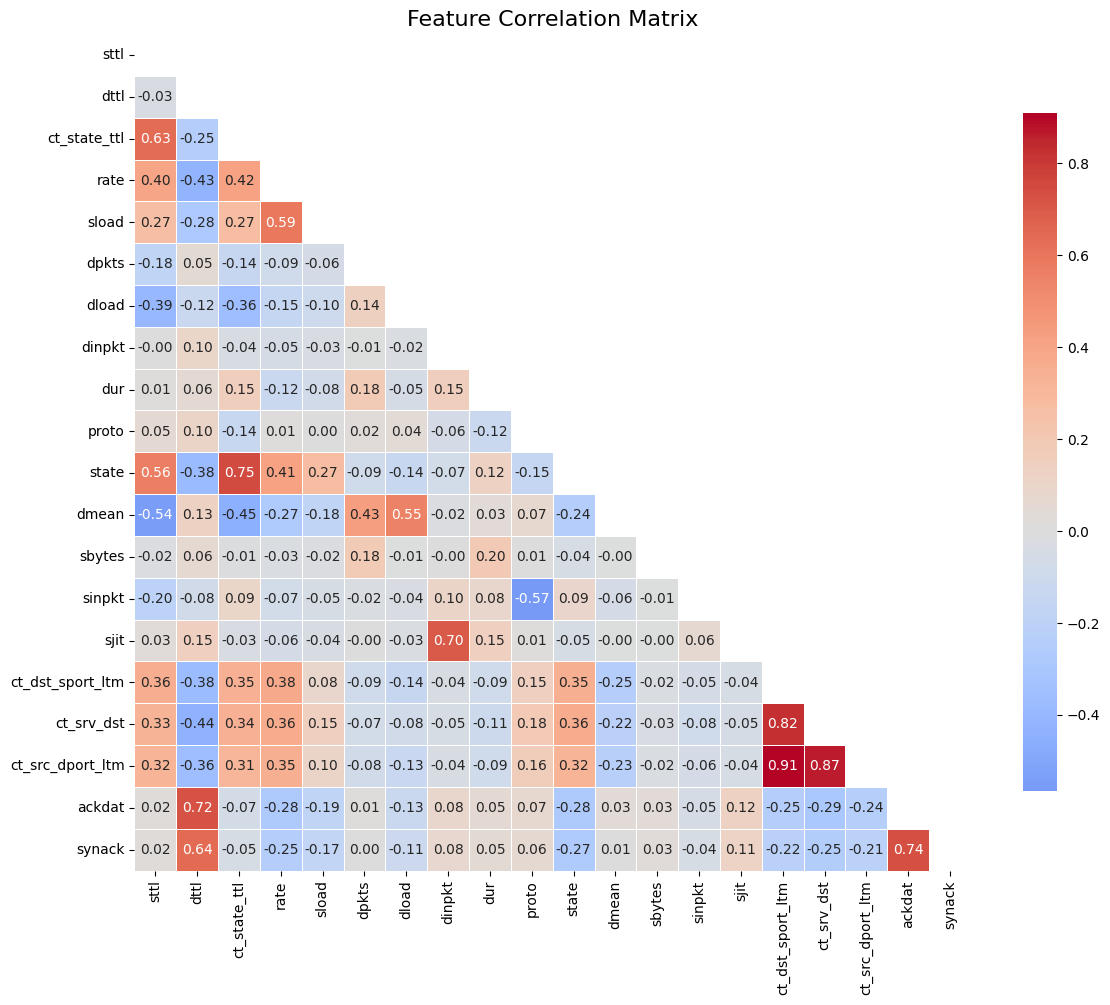

In [10]:
X_selected = X_train[final_20_features]


correlation_matrix = X_selected.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
class BinaryNIDS(nn.Module):
    def __init__(self, input_features=20, seq_length=10):
        super().__init__()


        self.conv1_3 = nn.Conv1d(input_features, 16, kernel_size=3, padding=1)
        self.conv1_5 = nn.Conv1d(input_features, 8, kernel_size=5, padding=2)

        self.bn1 = nn.BatchNorm1d(24)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(24, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(2)

        self.bilstm = nn.LSTM(
            input_size=32,
            hidden_size=16,
            num_layers=2,
            batch_first=True,
            bidirectional=True,
            dropout=0.3
        )

        self.attention = nn.Sequential(
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(32, 24),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(24, 12),
            nn.ReLU(),
            nn.Linear(12, 1)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.LSTM):
                for name, param in m.named_parameters():
                    if 'weight_ih' in name:
                        nn.init.xavier_uniform_(param.data)
                    elif 'weight_hh' in name:
                        nn.init.orthogonal_(param.data)
                    elif 'bias' in name:
                        nn.init.constant_(param.data, 0)

    def attention_net(self, lstm_output):
        attention_scores = self.attention(lstm_output)
        attention_weights = torch.softmax(attention_scores, dim=1)
        weighted_output = torch.sum(lstm_output * attention_weights, dim=1)
        return weighted_output

    def extract_features(self, x):
        x = x.permute(0, 2, 1)

        conv_3 = self.conv1_3(x)
        conv_5 = self.conv1_5(x)
        x = torch.cat([conv_3, conv_5], dim=1)

        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.permute(0, 2, 1)

        lstm_out, _ = self.bilstm(x)

        features = self.attention_net(lstm_out)

        return features

    def forward(self, x):
        features = self.extract_features(x)
        output = torch.sigmoid(self.classifier(features))
        return output

In [12]:
X_train_selected = X_train[final_20_features]
X_test_selected = X_test[final_20_features]

X_trainfinal, X_val, y_trainfinal, y_val = train_test_split(
    X_train_selected, y_train,
    test_size=0.2, stratify=y_train, random_state=42
)

custom_df = pd.concat([X_trainfinal, y_trainfinal], axis=1)



display(custom_df.head(10))


print("Attack label distribution:")
print(custom_df['label'].value_counts().sort_index())

,sttl,dttl,ct_state_ttl,rate,sload,dpkts,dload,dinpkt,dur,proto,state,dmean,sbytes,sinpkt,sjit,ct_dst_sport_ltm,ct_srv_dst,ct_src_dport_ltm,ackdat,synack,label
244911,0.996078,0.000000,0.333333,0.125000,0.009519,0.000000,0.000000,0.000000,1.333334e-07,0.901515,0.5,0.000000,0.000006,9.481877e-08,0.000000,0.355556,0.573770,0.551724,0.000000,0.000000,1
145029,0.996078,0.992126,0.166667,0.000027,0.000001,0.000545,0.000146,0.001635,9.108468e-03,0.856061,0.4,0.030000,0.000036,6.641554e-04,0.002011,0.000000,0.065574,0.000000,0.022847,0.023114,0
145970,0.996078,0.000000,0.333333,0.100000,0.071075,0.000000,0.000000,0.000000,1.666667e-07,0.901515,0.5,0.000000,0.000072,1.185234e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
235543,0.996078,0.000000,0.333333,0.333333,0.025384,0.000000,0.000000,0.000000,5.000001e-08,0.901515,0.5,0.000000,0.000006,3.555704e-08,0.000000,0.577778,0.819672,0.862069,0.000000,0.000000,1
138943,0.996078,0.000000,0.333333,0.333333,0.044534,0.000000,0.000000,0.000000,5.000001e-08,0.909091,0.5,0.000000,0.000012,3.555704e-08,0.000000,0.022222,0.032787,0.017241,0.000000,0.000000,1
253402,0.996078,0.000000,0.333333,0.125000,0.009519,0.000000,0.000000,0.000000,1.333334e-07,0.901515,0.5,0.000000,0.000006,9.481877e-08,0.000000,0.355556,0.262295,0.275862,0.000000,0.000000,1
89118,0.121569,0.114173,0.000000,0.001427,0.000116,0.000363,0.017021,0.000020,8.175001e-05,0.901515,0.2,0.052000,0.000038,1.545546e-05,0.000001,0.000000,0.081967,0.000000,0.000000,0.000000,0
96499,0.121569,0.114173,0.000000,0.000028,0.000002,0.001634,0.003060,0.001140,1.866330e-02,0.856061,0.4,0.376667,0.000116,1.020634e-03,0.005942,0.000000,0.000000,0.000000,0.000041,0.000147,0
36914,0.121569,0.114173,0.000000,0.001707,0.000100,0.001634,0.028667,0.000019,3.221334e-04,0.856061,0.4,0.060667,0.000106,1.502403e-05,0.000053,0.000000,0.131148,0.086207,0.000041,0.000141,0
137652,0.243137,0.992126,0.166667,0.000120,0.000003,0.003993,0.036141,0.000187,7.945568e-03,0.856061,0.4,0.748667,0.000067,4.346473e-04,0.001413,0.000000,0.000000,0.000000,0.015864,0.002220,1


Attack label distribution:
label
0     59520
1    105390
Name: count, dtype: int64


In [14]:
from imblearn.over_sampling import SMOTE


borderline_smote = BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=42,
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1'
)

X_trainfinal_resampled, y_trainfinal_resampled = borderline_smote.fit_resample(
    X_trainfinal, y_trainfinal
)

NameError: name 'BorderlineSMOTE' is not defined

In [ ]:
custom_df_resampled = pd.concat([
    pd.DataFrame(X_trainfinal_resampled, columns=final_20_features),
    pd.Series(y_trainfinal_resampled, name='label').reset_index(drop=True)
], axis=1)

display(custom_df_resampled.head(10))

,sttl,dttl,ct_state_ttl,rate,sload,dpkts,dload,dinpkt,dur,proto,state,dmean,sbytes,sinpkt,sjit,ct_dst_sport_ltm,ct_srv_dst,ct_src_dport_ltm,ackdat,synack,label
0,0.996078,0.000000,0.333333,0.125000,0.009519,0.000000,0.000000,0.000000,1.333334e-07,0.901515,0.5,0.000000,0.000006,9.481877e-08,0.000000,0.355556,0.573770,0.551724,0.000000,0.000000,1
1,0.996078,0.992126,0.166667,0.000027,0.000001,0.000545,0.000146,0.001635,9.108468e-03,0.856061,0.4,0.030000,0.000036,6.641554e-04,0.002011,0.000000,0.065574,0.000000,0.022847,0.023114,0
2,0.996078,0.000000,0.333333,0.100000,0.071075,0.000000,0.000000,0.000000,1.666667e-07,0.901515,0.5,0.000000,0.000072,1.185234e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.996078,0.000000,0.333333,0.333333,0.025384,0.000000,0.000000,0.000000,5.000001e-08,0.901515,0.5,0.000000,0.000006,3.555704e-08,0.000000,0.577778,0.819672,0.862069,0.000000,0.000000,1
4,0.996078,0.000000,0.333333,0.333333,0.044534,0.000000,0.000000,0.000000,5.000001e-08,0.909091,0.5,0.000000,0.000012,3.555704e-08,0.000000,0.022222,0.032787,0.017241,0.000000,0.000000,1
5,0.996078,0.000000,0.333333,0.125000,0.009519,0.000000,0.000000,0.000000,1.333334e-07,0.901515,0.5,0.000000,0.000006,9.481877e-08,0.000000,0.355556,0.262295,0.275862,0.000000,0.000000,1
6,0.121569,0.114173,0.000000,0.001427,0.000116,0.000363,0.017021,0.000020,8.175001e-05,0.901515,0.2,0.052000,0.000038,1.545546e-05,0.000001,0.000000,0.081967,0.000000,0.000000,0.000000,0
7,0.121569,0.114173,0.000000,0.000028,0.000002,0.001634,0.003060,0.001140,1.866330e-02,0.856061,0.4,0.376667,0.000116,1.020634e-03,0.005942,0.000000,0.000000,0.000000,0.000041,0.000147,0
8,0.121569,0.114173,0.000000,0.001707,0.000100,0.001634,0.028667,0.000019,3.221334e-04,0.856061,0.4,0.060667,0.000106,1.502403e-05,0.000053,0.000000,0.131148,0.086207,0.000041,0.000141,0
9,0.243137,0.992126,0.166667,0.000120,0.000003,0.003993,0.036141,0.000187,7.945568e-03,0.856061,0.4,0.748667,0.000067,4.346473e-04,0.001413,0.000000,0.000000,0.000000,0.015864,0.002220,1


In [ ]:
# import numpy as np
# import torch

# def create_sequences(X, y_binary, seq_length=10):
#     num_samples = len(X) - seq_length + 1

#     X_seq = np.zeros((num_samples, seq_length, X.shape[1]))
#     y_binary_seq = np.zeros(num_samples)

#     if hasattr(y_binary, 'iloc'):
#         y_binary = y_binary.values

#     for i in range(num_samples):
#         X_seq[i] = X[i:i+seq_length]
#         y_binary_seq[i] = y_binary[i+seq_length-1]

#     return X_seq, y_binary_seq

# X_train_seq, y_binary_train_seq = create_sequences(
#     X_trainfinal,
#     y_trainfinal,
#     seq_length=10
# )

# X_val_seq, y_binary_val_seq = create_sequences(
#     X_val,
#     y_val,
#     seq_length=10
# )

# X_test_seq, y_binary_test_seq = create_sequences(
#     X_test_selected,
#     y_test,
#     seq_length=10
# )

# X_train_tensor = torch.FloatTensor(X_train_seq)
# y_binary_train_tensor = torch.FloatTensor(y_binary_train_seq)

# X_val_tensor = torch.FloatTensor(X_val_seq)
# y_binary_val_tensor = torch.FloatTensor(y_binary_val_seq)

# X_test_tensor = torch.FloatTensor(X_test_seq)
# y_binary_test_tensor = torch.FloatTensor(y_binary_test_seq)

# print(f"\nSequence shapes:")
# print(f"Training: {X_train_tensor.shape} (samples, seq_length, features)")
# print(f"Validation: {X_val_tensor.shape}")
# print(f"Test: {X_test_tensor.shape}")

# print(f"\nBinary distribution in sequences:")
# print(f"Train - Normal: {(y_binary_train_tensor == 0).sum()}, Attack: {(y_binary_train_tensor == 1).sum()}")
# print(f"Val - Normal: {(y_binary_val_tensor == 0).sum()}, Attack: {(y_binary_val_tensor == 1).sum()}")
# print(f"Test - Normal: {(y_binary_test_tensor == 0).sum()}, Attack: {(y_binary_test_tensor == 1).sum()}")


Sequence shapes:
Training: torch.Size([164901, 10, 20]) (samples, seq_length, features)
Validation: torch.Size([41219, 10, 20])
Test: torch.Size([51526, 10, 20])

Binary distribution in sequences:
Train - Normal: 59516, Attack: 105385
Val - Normal: 14877, Attack: 26342
Test - Normal: 18597, Attack: 32929


In [ ]:
# BATCH_SIZE = 64

# train_dataset = TensorDataset(X_train_tensor, y_binary_train_tensor)
# train_loader = DataLoader(
#     train_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     num_workers=0,
#     pin_memory=True if torch.cuda.is_available() else False
# )

# val_dataset = TensorDataset(X_val_tensor, y_binary_val_tensor)
# val_loader = DataLoader(
#     val_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False,
#     num_workers=0,
#     pin_memory=True if torch.cuda.is_available() else False
# )

# test_dataset = TensorDataset(X_test_tensor, y_binary_test_tensor)
# test_loader = DataLoader(
#     test_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False,
#     num_workers=0,
#     pin_memory=True if torch.cuda.is_available() else False
# )

# print(f"\nDataLoader ready:")
# print(f"Train batches: {len(train_loader)}")
# print(f"Val batches: {len(val_loader)}")
# print(f"Test batches: {len(test_loader)}")


DataLoader ready:
Train batches: 2577
Val batches: 645
Test batches: 806


In [ ]:
# binary_counts = Counter(y_binary_train_tensor.numpy())
# num_normal = binary_counts[0]
# num_attack = binary_counts[1]

# # pos_weight = torch.tensor([num_normal / num_attack])
# # pos_weight = torch.tensor([num_attack/ num_normal])
# pos_weight = torch.tensor(1)


# print(f"Binary Classification:")
# print(f"Normal samples: {num_normal}")
# print(f"Attack samples: {num_attack}")
# print(f"Positive weight: {pos_weight.item():.3f}")

Binary Classification:
Normal samples: 59516
Attack samples: 105385
Positive weight: 1.000


In [ ]:
import numpy as np
import torch

def create_sequences(X, y_binary, seq_length=10):
    num_samples = len(X) - seq_length + 1

    X_seq = np.zeros((num_samples, seq_length, X.shape[1]))
    y_binary_seq = np.zeros(num_samples)

    if hasattr(y_binary, 'iloc'):
        y_binary = y_binary.values

    for i in range(num_samples):
        X_seq[i] = X[i:i+seq_length]
        y_binary_seq[i] = y_binary[i+seq_length-1]

    return X_seq, y_binary_seq

X_train_seq, y_binary_train_seq = create_sequences(
    X_trainfinal,
    y_trainfinal,
    seq_length=10
)

X_val_seq, y_binary_val_seq = create_sequences(
    X_val,
    y_val,
    seq_length=10
)

X_test_seq, y_binary_test_seq = create_sequences(
    X_test_selected,
    y_test,
    seq_length=10
)

X_train_tensor = torch.FloatTensor(X_train_seq)
y_binary_train_tensor = torch.FloatTensor(y_binary_train_seq)

X_val_tensor = torch.FloatTensor(X_val_seq)
y_binary_val_tensor = torch.FloatTensor(y_binary_val_seq)

X_test_tensor = torch.FloatTensor(X_test_seq)
y_binary_test_tensor = torch.FloatTensor(y_binary_test_seq)

print(f"\nSequence shapes:")
print(f"Training: {X_train_tensor.shape} (samples, seq_length, features)")
print(f"Validation: {X_val_tensor.shape}")
print(f"Test: {X_test_tensor.shape}")

print(f"\nBinary distribution in sequences:")
print(f"Train - Normal: {(y_binary_train_tensor == 0).sum()}, Attack: {(y_binary_train_tensor == 1).sum()}")
print(f"Val - Normal: {(y_binary_val_tensor == 0).sum()}, Attack: {(y_binary_val_tensor == 1).sum()}")
print(f"Test - Normal: {(y_binary_test_tensor == 0).sum()}, Attack: {(y_binary_test_tensor == 1).sum()}")

BATCH_SIZE = 64

train_dataset = TensorDataset(X_train_tensor, y_binary_train_tensor)
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False
)

val_dataset = TensorDataset(X_val_tensor, y_binary_val_tensor)
val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False
)

test_dataset = TensorDataset(X_test_tensor, y_binary_test_tensor)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"\nDataLoader ready:")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

from collections import Counter

binary_counts = Counter(y_binary_train_tensor.numpy())
total_samples = len(y_binary_train_tensor)

class_weights_sqrt = []
for i in range(2):
    count = binary_counts.get(float(i), 1)
    freq = count / total_samples
    weight = 1.0 / np.sqrt(freq)
    class_weights_sqrt.append(weight)

total_weight = sum(class_weights_sqrt)
class_weights_sqrt = [w * 2 / total_weight for w in class_weights_sqrt]
binary_weights_sqrt = torch.FloatTensor(class_weights_sqrt)

print(f"\nSquare Root Frequency Binary Weights:")
for i, weight in enumerate(class_weights_sqrt):
    count = binary_counts.get(float(i), 0)
    label_name = "Normal" if i == 0 else "Attack"
    print(f"Class {i} ({label_name}): count={count}, weight={weight:.3f}")


Sequence shapes:
Training: torch.Size([164901, 10, 20]) (samples, seq_length, features)
Validation: torch.Size([41219, 10, 20])
Test: torch.Size([51526, 10, 20])

Binary distribution in sequences:
Train - Normal: 59516, Attack: 105385
Val - Normal: 14877, Attack: 26342
Test - Normal: 18597, Attack: 32929

DataLoader ready:
Train batches: 2577
Val batches: 645
Test batches: 806

Square Root Frequency Binary Weights:
Class 0 (Normal): count=59516, weight=1.142
Class 1 (Attack): count=105385, weight=0.858


In [ ]:
import gc
import torch
import torch.nn as nn

gc.collect()
torch.cuda.empty_cache()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BinaryNIDS(input_features=20, seq_length=10)
model = model.to(device)

pos_weight = torch.FloatTensor([binary_weights_sqrt[1] / binary_weights_sqrt[0]])
binary_criterion = nn.BCELoss()

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.01, betas=(0.9, 0.999))

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    patience=5,
    factor=0.5,
    min_lr=1e-6,
)

print(f"Model created successfully!")
print(f"Device: {device}")
print(f"Positive weight: {pos_weight.item():.3f}")

Model created successfully!
Device: cuda
Positive weight: 0.751


In [ ]:
print(f"\nModel Configuration:")
print(f"Device: {device}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Binary loss positive weight: {pos_weight.item():.3f}")


Model Configuration:
Device: cuda
Total parameters: 18,682
Binary loss positive weight: 0.751


In [ ]:
GRADIENT_CLIP = 1.0
EARLY_STOPPING_PATIENCE = 7

binary_metrics = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': [],
    'train_fpr': [], 'val_fpr': [],
    'train_fnr': [], 'val_fnr': []
}

In [ ]:
# import numpy as np
# import torch
# from sklearn.metrics import classification_report

# def train_binary_epoch(model, loader, criterion, optimizer, device):
#     model.train()
#     total_loss = 0
#     predictions = []
#     targets = []

#     for batch_x, batch_y_binary in loader:
#         batch_x, batch_y_binary = batch_x.to(device), batch_y_binary.to(device)

#         optimizer.zero_grad()
#         outputs = model(batch_x).squeeze()
#         loss = criterion(outputs, batch_y_binary)
#         loss.backward()

#         torch.nn.utils.clip_grad_norm_(model.parameters(), GRADIENT_CLIP)

#         optimizer.step()

#         total_loss += loss.item()
#         predictions.extend(outputs.cpu().detach().numpy())
#         targets.extend(batch_y_binary.cpu().numpy())

#     predictions = np.array(predictions)
#     targets = np.array(targets)
#     preds_binary = (predictions > 0.5).astype(int)

#     accuracy = np.mean(preds_binary == targets)
#     tp = np.sum((preds_binary == 1) & (targets == 1))
#     fp = np.sum((preds_binary == 1) & (targets == 0))
#     tn = np.sum((preds_binary == 0) & (targets == 0))
#     fn = np.sum((preds_binary == 0) & (targets == 1))

#     fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
#     fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

#     return total_loss / len(loader), accuracy, fpr, fnr, predictions, targets

# def evaluate_binary(model, loader, criterion, device):
#     model.eval()
#     total_loss = 0
#     predictions = []
#     targets = []

#     with torch.no_grad():
#         for batch_x, batch_y_binary in loader:
#             batch_x, batch_y_binary = batch_x.to(device), batch_y_binary.to(device)

#             outputs = model(batch_x).squeeze()
#             loss = criterion(outputs, batch_y_binary)

#             total_loss += loss.item()
#             predictions.extend(outputs.cpu().numpy())
#             targets.extend(batch_y_binary.cpu().numpy())

#     predictions = np.array(predictions)
#     targets = np.array(targets)
#     preds_binary = (predictions > 0.5).astype(int)

#     accuracy = np.mean(preds_binary == targets)
#     tp = np.sum((preds_binary == 1) & (targets == 1))
#     fp = np.sum((preds_binary == 1) & (targets == 0))
#     tn = np.sum((preds_binary == 0) & (targets == 0))
#     fn = np.sum((preds_binary == 0) & (targets == 1))

#     fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
#     fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

#     report = classification_report(targets, preds_binary,
#                                  target_names=['Normal', 'Attack'],
#                                  output_dict=True)

#     return total_loss / len(loader), accuracy, fpr, fnr, predictions, targets, report

In [ ]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, classification_report

# print("\nFinal Model Evaluation")
# print("=" * 60)

# test_loss, test_binary_acc, test_fpr, test_fnr, test_preds, test_targets, test_binary_report = evaluate_binary(
#     model, test_loader, binary_criterion, device
# )

# print(f"\nTest Set Binary Classification:")
# print(f"Accuracy: {test_binary_acc:.4f}")
# print(f"FPR: {test_fpr:.4f}, FNR: {test_fnr:.4f}")
# print("\nBinary Classification Report:")
# print(classification_report(test_targets, (test_preds > 0.5).astype(int),
#                           target_names=['Normal', 'Attack']))

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# binary_cm = confusion_matrix(test_targets, (test_preds > 0.5).astype(int))
# sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'], ax=axes[0])
# axes[0].set_title('Binary Classification Confusion Matrix')
# axes[0].set_xlabel('Predicted')
# axes[0].set_ylabel('Actual')

# metrics_text = f"""Final Performance Summary:
# ------------------------
# Binary Classification:
#   Test Accuracy: {test_binary_acc:.3f}
#   Test FPR: {test_fpr:.3f}
#   Test FNR: {test_fnr:.3f}

#   Precision (Normal): {test_binary_report['Normal']['precision']:.3f}
#   Recall (Normal): {test_binary_report['Normal']['recall']:.3f}
#   F1-Score (Normal): {test_binary_report['Normal']['f1-score']:.3f}

#   Precision (Attack): {test_binary_report['Attack']['precision']:.3f}
#   Recall (Attack): {test_binary_report['Attack']['recall']:.3f}
#   F1-Score (Attack): {test_binary_report['Attack']['f1-score']:.3f}

# Model Complexity:
#   Parameters: {sum(p.numel() for p in model.parameters()):,}
#   Size: ~{sum(p.numel() for p in model.parameters()) * 4 / 1024 / 1024:.2f} MB
# """

# axes[1].text(0.1, 0.5, metrics_text, transform=axes[1].transAxes,
#              fontsize=11, verticalalignment='center', fontfamily='monospace')
# axes[1].axis('off')

# plt.tight_layout()
# plt.show()

# torch.save({
#     'model_state_dict': model.state_dict(),
#     'binary_metrics': binary_metrics,
#     'test_results': {
#         'binary_acc': test_binary_acc,
#         'fpr': test_fpr,
#         'fnr': test_fnr
#     }
# }, 'final_binary_nids_model.pth')

# print("\nModel saved successfully!")

Binary Classification Training

Epoch 1/50
Train - Loss: 0.1871, Acc: 0.9043, P: 0.9043, R: 0.9508, F1: 0.9270
Val   - Loss: 0.1798, Acc: 0.9074, P: 0.9257, R: 0.9297, F1: 0.9277

Epoch 3/50
Train - Loss: 0.1852, Acc: 0.9040, P: 0.9093, R: 0.9439, F1: 0.9263
Val   - Loss: 0.1801, Acc: 0.9076, P: 0.9273, R: 0.9282, F1: 0.9278

Epoch 6/50
Train - Loss: 0.1832, Acc: 0.9048, P: 0.9132, R: 0.9404, F1: 0.9266
Val   - Loss: 0.1774, Acc: 0.9084, P: 0.9339, R: 0.9219, F1: 0.9279

Epoch 9/50
Train - Loss: 0.1810, Acc: 0.9062, P: 0.9175, R: 0.9375, F1: 0.9274
Val   - Loss: 0.1726, Acc: 0.9089, P: 0.9121, R: 0.9489, F1: 0.9302

Epoch 12/50
Train - Loss: 0.1786, Acc: 0.9074, P: 0.9164, R: 0.9409, F1: 0.9285
Val   - Loss: 0.1710, Acc: 0.9120, P: 0.9311, R: 0.9313, F1: 0.9312

Epoch 15/50
Train - Loss: 0.1772, Acc: 0.9075, P: 0.9175, R: 0.9397, F1: 0.9285
Val   - Loss: 0.1727, Acc: 0.9099, P: 0.9438, R: 0.9134, F1: 0.9283

Epoch 18/50
Train - Loss: 0.1760, Acc: 0.9092, P: 0.9196, R: 0.9402, F1: 0.929

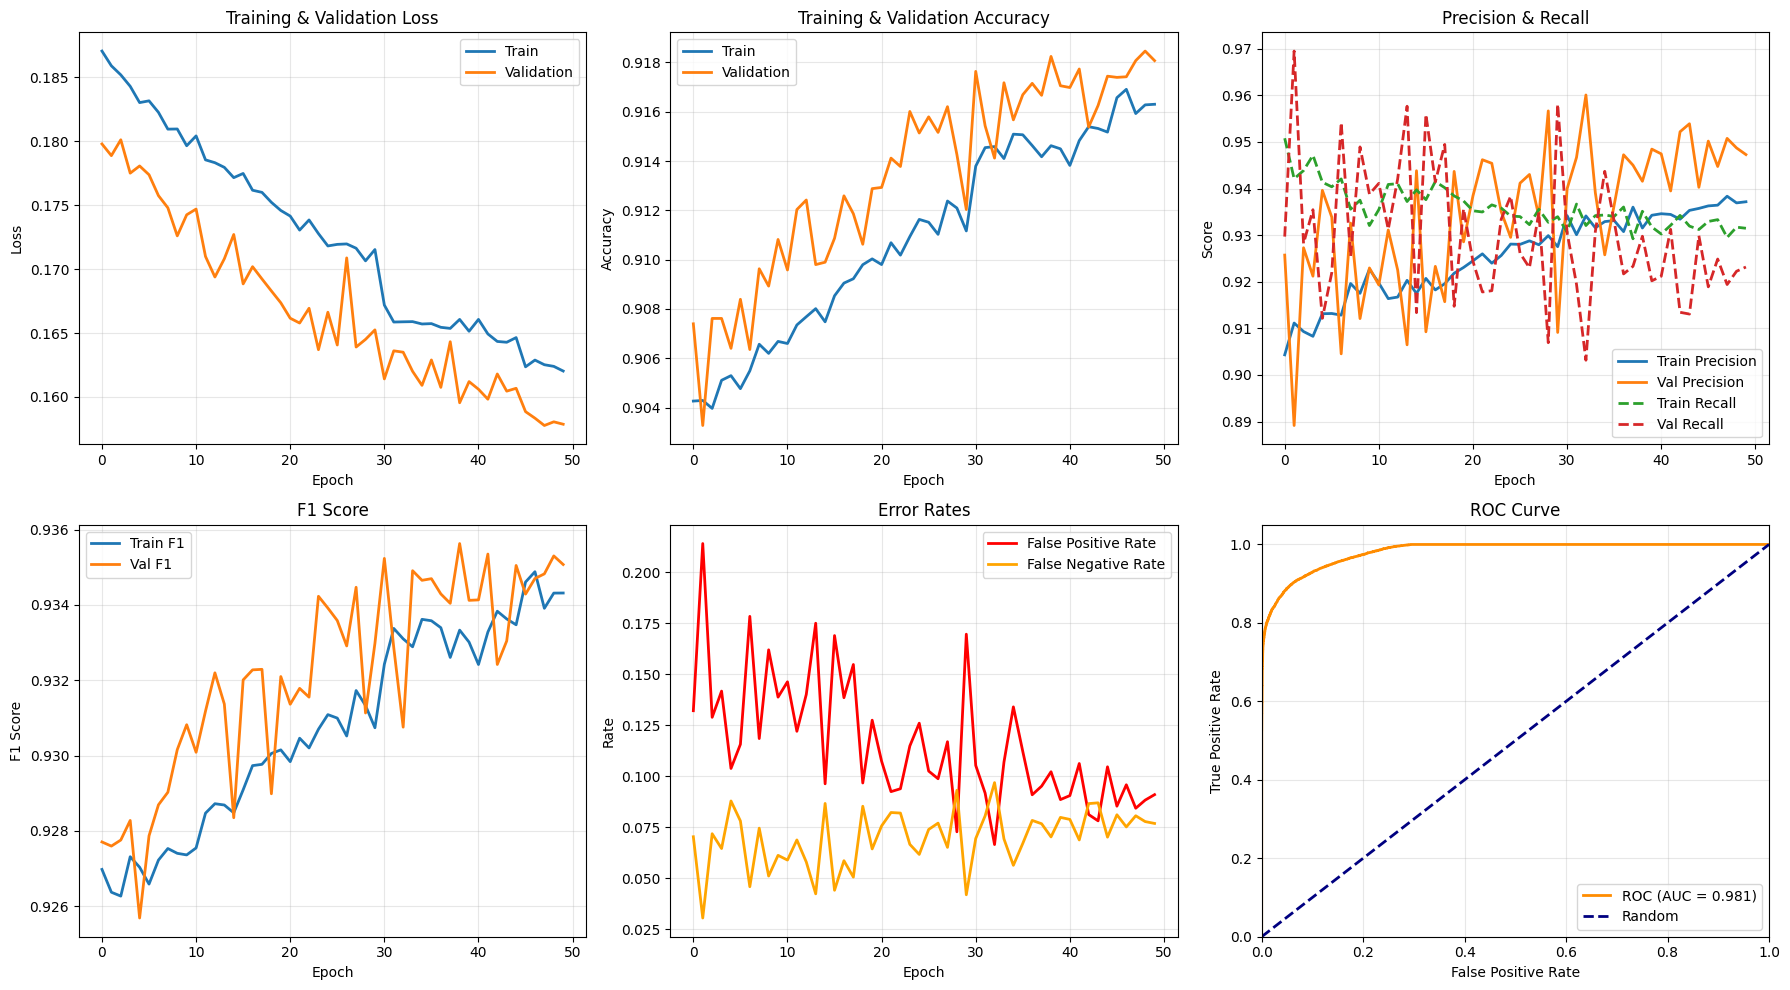


Overfitting Analysis:
Train-Val Accuracy Gap: -0.0018
⚠ Possible underfitting detected

Test Set Evaluation

Test Performance:
Accuracy:    0.9207
Precision:   0.9503
Recall:      0.9243
F1-Score:    0.9371
Specificity: 0.9144
FPR:         0.0856
FNR:         0.0757
MCC:         0.8306
Cohen Kappa: 0.8300

Classification Report:
              precision    recall  f1-score   support

      Normal     0.8722    0.9144    0.8928     18597
      Attack     0.9503    0.9243    0.9371     32929

    accuracy                         0.9207     51526
   macro avg     0.9112    0.9194    0.9150     51526
weighted avg     0.9221    0.9207    0.9211     51526



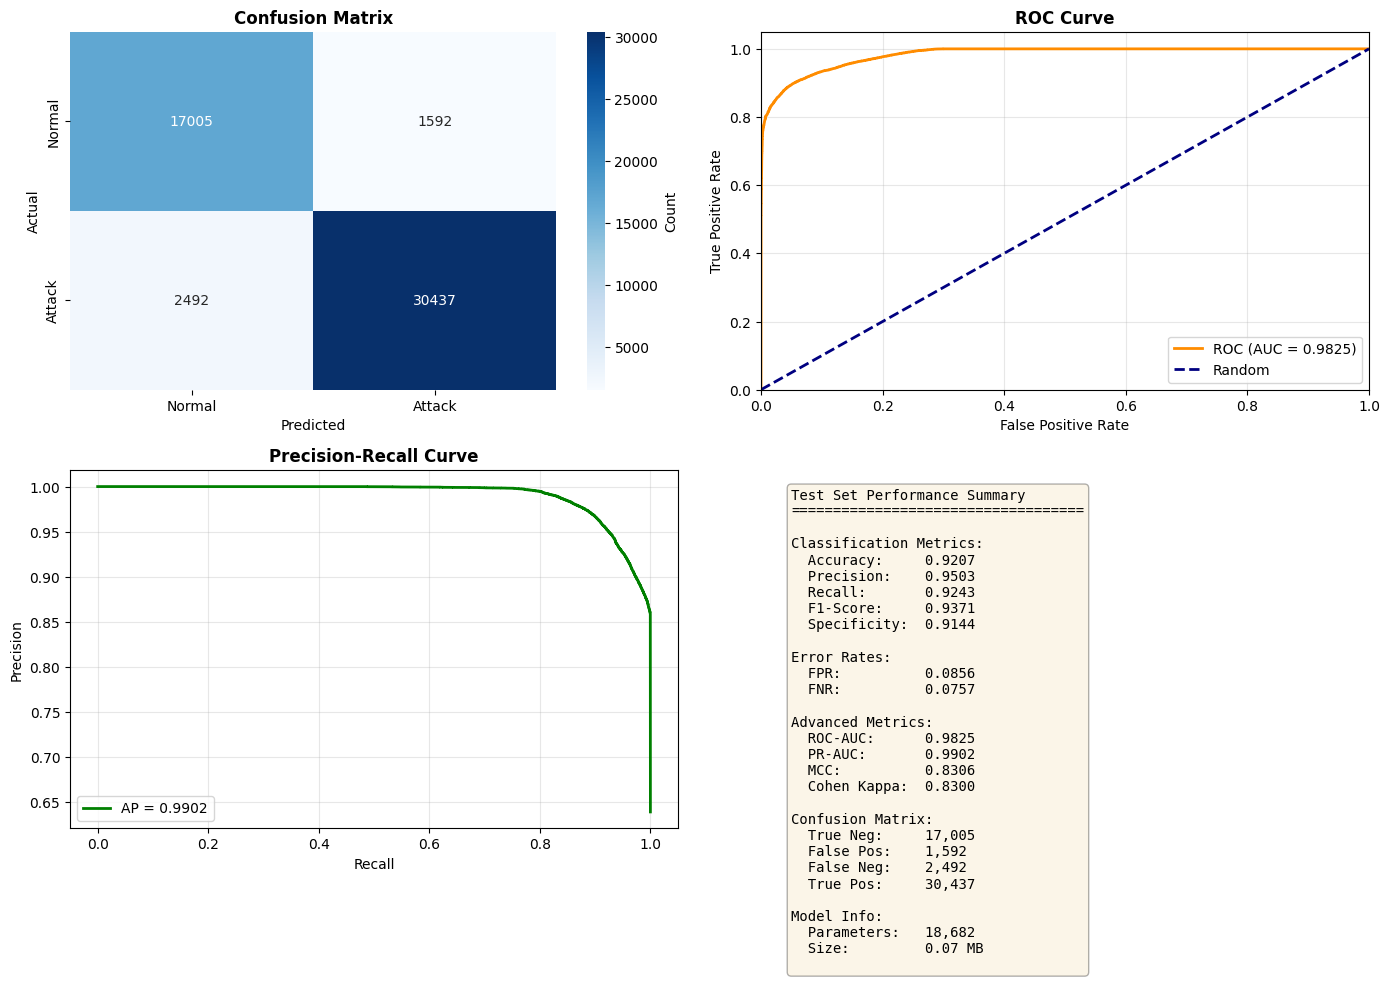


✓ Model and metrics saved successfully!


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve,
                            auc, precision_recall_curve, average_precision_score,
                            matthews_corrcoef, cohen_kappa_score)

def train_epoch(model, loader, criterion, optimizer, device, gradient_clip):
    model.train()
    total_loss = 0
    all_preds = []
    all_targets = []

    for batch_x, batch_y in loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
        optimizer.step()

        total_loss += loss.item()
        all_preds.extend(outputs.cpu().detach().numpy())
        all_targets.extend(batch_y.cpu().numpy())

    preds = np.array(all_preds)
    targets = np.array(all_targets)
    preds_binary = (preds > 0.5).astype(int)

    metrics = calculate_metrics(targets, preds, preds_binary)
    metrics['loss'] = total_loss / len(loader)

    return metrics

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for batch_x, batch_y in loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)

            total_loss += loss.item()
            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(batch_y.cpu().numpy())

    preds = np.array(all_preds)
    targets = np.array(all_targets)
    preds_binary = (preds > 0.5).astype(int)

    metrics = calculate_metrics(targets, preds, preds_binary)
    metrics['loss'] = total_loss / len(loader)
    metrics['predictions'] = preds
    metrics['targets'] = targets

    return metrics

def calculate_metrics(targets, pred_probs, pred_binary):
    tp = np.sum((pred_binary == 1) & (targets == 1))
    fp = np.sum((pred_binary == 1) & (targets == 0))
    tn = np.sum((pred_binary == 0) & (targets == 0))
    fn = np.sum((pred_binary == 0) & (targets == 1))

    accuracy = np.mean(pred_binary == targets)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'fpr': fpr,
        'fnr': fnr,
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
    }

print("Binary Classification Training")
print("=" * 60)

NUM_EPOCHS = 50
GRADIENT_CLIP = 1.0
EARLY_STOPPING_PATIENCE = 10

history = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': [],
    'train_precision': [], 'val_precision': [],
    'train_recall': [], 'val_recall': [],
    'train_f1': [], 'val_f1': [],
    'train_fpr': [], 'val_fpr': [],
    'train_fnr': [], 'val_fnr': []
}

best_val_acc = 0
patience_counter = 0

for epoch in range(NUM_EPOCHS):
    train_metrics = train_epoch(model, train_loader, binary_criterion, optimizer, device, GRADIENT_CLIP)
    val_metrics = evaluate(model, val_loader, binary_criterion, device)

    history['train_loss'].append(train_metrics['loss'])
    history['val_loss'].append(val_metrics['loss'])
    history['train_acc'].append(train_metrics['accuracy'])
    history['val_acc'].append(val_metrics['accuracy'])
    history['train_precision'].append(train_metrics['precision'])
    history['val_precision'].append(val_metrics['precision'])
    history['train_recall'].append(train_metrics['recall'])
    history['val_recall'].append(val_metrics['recall'])
    history['train_f1'].append(train_metrics['f1'])
    history['val_f1'].append(val_metrics['f1'])
    history['train_fpr'].append(train_metrics['fpr'])
    history['val_fpr'].append(val_metrics['fpr'])
    history['train_fnr'].append(train_metrics['fnr'])
    history['val_fnr'].append(val_metrics['fnr'])

    scheduler.step(val_metrics['loss'])

    if val_metrics['accuracy'] > best_val_acc:
        best_val_acc = val_metrics['accuracy']
        patience_counter = 0
        torch.save(model.state_dict(), 'best_binary_model.pth')
    else:
        patience_counter += 1

    if patience_counter >= EARLY_STOPPING_PATIENCE:
        print(f"Early stopping at epoch {epoch+1}")
        break

    if (epoch + 1) % 3 == 0 or epoch == 0:
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
        print(f"Train - Loss: {train_metrics['loss']:.4f}, Acc: {train_metrics['accuracy']:.4f}, "
              f"P: {train_metrics['precision']:.4f}, R: {train_metrics['recall']:.4f}, F1: {train_metrics['f1']:.4f}")
        print(f"Val   - Loss: {val_metrics['loss']:.4f}, Acc: {val_metrics['accuracy']:.4f}, "
              f"P: {val_metrics['precision']:.4f}, R: {val_metrics['recall']:.4f}, F1: {val_metrics['f1']:.4f}")

val_preds = val_metrics['predictions']
val_targets = val_metrics['targets']

print("\n" + "="*60)
print("Training Visualization")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].plot(history['train_loss'], label='Train', linewidth=2)
axes[0, 0].plot(history['val_loss'], label='Validation', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training & Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history['train_acc'], label='Train', linewidth=2)
axes[0, 1].plot(history['val_acc'], label='Validation', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Training & Validation Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(history['train_precision'], label='Train Precision', linewidth=2)
axes[0, 2].plot(history['val_precision'], label='Val Precision', linewidth=2)
axes[0, 2].plot(history['train_recall'], label='Train Recall', linewidth=2, linestyle='--')
axes[0, 2].plot(history['val_recall'], label='Val Recall', linewidth=2, linestyle='--')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Score')
axes[0, 2].set_title('Precision & Recall')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].plot(history['train_f1'], label='Train F1', linewidth=2)
axes[1, 0].plot(history['val_f1'], label='Val F1', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(history['val_fpr'], label='False Positive Rate', color='red', linewidth=2)
axes[1, 1].plot(history['val_fnr'], label='False Negative Rate', color='orange', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Rate')
axes[1, 1].set_title('Error Rates')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

fpr_roc, tpr_roc, _ = roc_curve(val_targets, val_preds)
roc_auc = auc(fpr_roc, tpr_roc)
axes[1, 2].plot(fpr_roc, tpr_roc, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[1, 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[1, 2].set_xlim([0.0, 1.0])
axes[1, 2].set_ylim([0.0, 1.05])
axes[1, 2].set_xlabel('False Positive Rate')
axes[1, 2].set_ylabel('True Positive Rate')
axes[1, 2].set_title('ROC Curve')
axes[1, 2].legend(loc="lower right")
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

train_val_gap = history['train_acc'][-1] - history['val_acc'][-1]
print(f"\nOverfitting Analysis:")
print(f"Train-Val Accuracy Gap: {train_val_gap:.4f}")
if train_val_gap > 0.1:
    print("⚠ Possible overfitting detected")
elif train_val_gap < 0.02:
    print("⚠ Possible underfitting detected")
else:
    print("✓ Model appears well-fitted")

print("\n" + "="*60)
print("Test Set Evaluation")
print("="*60)

model.load_state_dict(torch.load('best_binary_model.pth'))
test_metrics = evaluate(model, test_loader, binary_criterion, device)

test_preds = test_metrics['predictions']
test_targets = test_metrics['targets']
test_preds_binary = (test_preds > 0.5).astype(int)

print(f"\nTest Performance:")
print(f"Accuracy:    {test_metrics['accuracy']:.4f}")
print(f"Precision:   {test_metrics['precision']:.4f}")
print(f"Recall:      {test_metrics['recall']:.4f}")
print(f"F1-Score:    {test_metrics['f1']:.4f}")
print(f"Specificity: {test_metrics['specificity']:.4f}")
print(f"FPR:         {test_metrics['fpr']:.4f}")
print(f"FNR:         {test_metrics['fnr']:.4f}")

mcc = matthews_corrcoef(test_targets, test_preds_binary)
kappa = cohen_kappa_score(test_targets, test_preds_binary)
print(f"MCC:         {mcc:.4f}")
print(f"Cohen Kappa: {kappa:.4f}")

print("\nClassification Report:")
print(classification_report(test_targets, test_preds_binary, target_names=['Normal', 'Attack'], digits=4))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cm = confusion_matrix(test_targets, test_preds_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
            ax=axes[0, 0], cbar_kws={'label': 'Count'})
axes[0, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

fpr_roc, tpr_roc, _ = roc_curve(test_targets, test_preds)
roc_auc = auc(fpr_roc, tpr_roc)
axes[0, 1].plot(fpr_roc, tpr_roc, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontsize=12, fontweight='bold')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

precision_curve, recall_curve, _ = precision_recall_curve(test_targets, test_preds)
avg_precision = average_precision_score(test_targets, test_preds)
axes[1, 0].plot(recall_curve, precision_curve, color='green', lw=2, label=f'AP = {avg_precision:.4f}')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve', fontsize=12, fontweight='bold')
axes[1, 0].legend(loc="lower left")
axes[1, 0].grid(True, alpha=0.3)

metrics_summary = f"""Test Set Performance Summary
{'='*35}

Classification Metrics:
  Accuracy:     {test_metrics['accuracy']:.4f}
  Precision:    {test_metrics['precision']:.4f}
  Recall:       {test_metrics['recall']:.4f}
  F1-Score:     {test_metrics['f1']:.4f}
  Specificity:  {test_metrics['specificity']:.4f}

Error Rates:
  FPR:          {test_metrics['fpr']:.4f}
  FNR:          {test_metrics['fnr']:.4f}

Advanced Metrics:
  ROC-AUC:      {roc_auc:.4f}
  PR-AUC:       {avg_precision:.4f}
  MCC:          {mcc:.4f}
  Cohen Kappa:  {kappa:.4f}

Confusion Matrix:
  True Neg:     {test_metrics['tn']:,}
  False Pos:    {test_metrics['fp']:,}
  False Neg:    {test_metrics['fn']:,}
  True Pos:     {test_metrics['tp']:,}

Model Info:
  Parameters:   {sum(p.numel() for p in model.parameters()):,}
  Size:         {sum(p.numel() for p in model.parameters()) * 4 / 1024 / 1024:.2f} MB
"""

axes[1, 1].text(0.05, 0.95, metrics_summary, transform=axes[1, 1].transAxes,
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

torch.save({
    'model_state_dict': model.state_dict(),
    'history': history,
    'test_metrics': {
        'accuracy': test_metrics['accuracy'],
        'precision': test_metrics['precision'],
        'recall': test_metrics['recall'],
        'f1': test_metrics['f1'],
        'fpr': test_metrics['fpr'],
        'fnr': test_metrics['fnr'],
        'roc_auc': roc_auc,
        'pr_auc': avg_precision,
        'mcc': mcc,
        'kappa': kappa
    },
    'optimizer_state_dict': optimizer.state_dict()
}, 'final_binary_nids_model.pth')

print("\n✓ Model and metrics saved successfully!")


**`Ablation`**

In [ ]:
class Net_NoAttention(nn.Module):
    def __init__(self, input_features=20, seq_length=10, num_attack_types=9):
        super().__init__()

        self.conv1_3 = nn.Conv1d(input_features, 16, kernel_size=3, padding=1)
        self.conv1_5 = nn.Conv1d(input_features, 8, kernel_size=5, padding=2)

        self.bn1 = nn.BatchNorm1d(24)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(24, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(2)

        self.bilstm = nn.LSTM(
            input_size=32,
            hidden_size=16,
            num_layers=2,
            batch_first=True,
            bidirectional=True,
            dropout=0.3
        )

        self.binary_head = nn.Sequential(
            nn.Linear(32, 24),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(24, 12),
            nn.ReLU(),
            nn.Linear(12, 1)
        )

        self.multiclass_head = nn.Sequential(
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, num_attack_types)
        )

    def extract_features(self, x):
        x = x.permute(0, 2, 1)

        x = torch.cat([self.conv1_3(x), self.conv1_5(x)], dim=1)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.permute(0, 2, 1)
        lstm_out, _ = self.bilstm(x)

        features = torch.mean(lstm_out, dim=1)
        return features

    def forward(self, x):
        features = self.extract_features(x)
        return self.binary_head(features), self.multiclass_head(features)


In [ ]:
import gc
import torch
import torch.nn as nn

gc.collect()
torch.cuda.empty_cache()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net_NoAttention(input_features=20, seq_length=10)
model = model.to(device)

pos_weight = torch.FloatTensor([binary_weights_sqrt[1] / binary_weights_sqrt[0]])
binary_criterion = nn.BCELoss()

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.01, betas=(0.9, 0.999))

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    patience=5,
    factor=0.5,
    min_lr=1e-6,
)

print(f"Model created successfully!")
print(f"Device: {device}")
print(f"Positive weight: {pos_weight.item():.3f}")

In [ ]:
GRADIENT_CLIP = 1.0
EARLY_STOPPING_PATIENCE = 7

binary_metrics = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': [],
    'train_fpr': [], 'val_fpr': [],
    'train_fnr': [], 'val_fnr': []
}

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve,
                            auc, precision_recall_curve, average_precision_score,
                            matthews_corrcoef, cohen_kappa_score)

def train_epoch(model, loader, criterion, optimizer, device, gradient_clip):
    model.train()
    total_loss = 0
    all_preds = []
    all_targets = []

    for batch_x, batch_y in loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
        optimizer.step()

        total_loss += loss.item()
        all_preds.extend(outputs.cpu().detach().numpy())
        all_targets.extend(batch_y.cpu().numpy())

    preds = np.array(all_preds)
    targets = np.array(all_targets)
    preds_binary = (preds > 0.5).astype(int)

    metrics = calculate_metrics(targets, preds, preds_binary)
    metrics['loss'] = total_loss / len(loader)

    return metrics

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for batch_x, batch_y in loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)

            total_loss += loss.item()
            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(batch_y.cpu().numpy())

    preds = np.array(all_preds)
    targets = np.array(all_targets)
    preds_binary = (preds > 0.5).astype(int)

    metrics = calculate_metrics(targets, preds, preds_binary)
    metrics['loss'] = total_loss / len(loader)
    metrics['predictions'] = preds
    metrics['targets'] = targets

    return metrics

def calculate_metrics(targets, pred_probs, pred_binary):
    tp = np.sum((pred_binary == 1) & (targets == 1))
    fp = np.sum((pred_binary == 1) & (targets == 0))
    tn = np.sum((pred_binary == 0) & (targets == 0))
    fn = np.sum((pred_binary == 0) & (targets == 1))

    accuracy = np.mean(pred_binary == targets)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'fpr': fpr,
        'fnr': fnr,
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
    }

print("Binary Classification Training")
print("=" * 60)

NUM_EPOCHS = 50
GRADIENT_CLIP = 1.0
EARLY_STOPPING_PATIENCE = 10

history = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': [],
    'train_precision': [], 'val_precision': [],
    'train_recall': [], 'val_recall': [],
    'train_f1': [], 'val_f1': [],
    'train_fpr': [], 'val_fpr': [],
    'train_fnr': [], 'val_fnr': []
}

best_val_acc = 0
patience_counter = 0

for epoch in range(NUM_EPOCHS):
    train_metrics = train_epoch(model, train_loader, binary_criterion, optimizer, device, GRADIENT_CLIP)
    val_metrics = evaluate(model, val_loader, binary_criterion, device)

    history['train_loss'].append(train_metrics['loss'])
    history['val_loss'].append(val_metrics['loss'])
    history['train_acc'].append(train_metrics['accuracy'])
    history['val_acc'].append(val_metrics['accuracy'])
    history['train_precision'].append(train_metrics['precision'])
    history['val_precision'].append(val_metrics['precision'])
    history['train_recall'].append(train_metrics['recall'])
    history['val_recall'].append(val_metrics['recall'])
    history['train_f1'].append(train_metrics['f1'])
    history['val_f1'].append(val_metrics['f1'])
    history['train_fpr'].append(train_metrics['fpr'])
    history['val_fpr'].append(val_metrics['fpr'])
    history['train_fnr'].append(train_metrics['fnr'])
    history['val_fnr'].append(val_metrics['fnr'])

    scheduler.step(val_metrics['loss'])

    if val_metrics['accuracy'] > best_val_acc:
        best_val_acc = val_metrics['accuracy']
        patience_counter = 0
        torch.save(model.state_dict(), 'best_binary_model.pth')
    else:
        patience_counter += 1

    if patience_counter >= EARLY_STOPPING_PATIENCE:
        print(f"Early stopping at epoch {epoch+1}")
        break

    if (epoch + 1) % 3 == 0 or epoch == 0:
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
        print(f"Train - Loss: {train_metrics['loss']:.4f}, Acc: {train_metrics['accuracy']:.4f}, "
              f"P: {train_metrics['precision']:.4f}, R: {train_metrics['recall']:.4f}, F1: {train_metrics['f1']:.4f}")
        print(f"Val   - Loss: {val_metrics['loss']:.4f}, Acc: {val_metrics['accuracy']:.4f}, "
              f"P: {val_metrics['precision']:.4f}, R: {val_metrics['recall']:.4f}, F1: {val_metrics['f1']:.4f}")

val_preds = val_metrics['predictions']
val_targets = val_metrics['targets']

print("\n" + "="*60)
print("Training Visualization")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].plot(history['train_loss'], label='Train', linewidth=2)
axes[0, 0].plot(history['val_loss'], label='Validation', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training & Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history['train_acc'], label='Train', linewidth=2)
axes[0, 1].plot(history['val_acc'], label='Validation', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Training & Validation Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(history['train_precision'], label='Train Precision', linewidth=2)
axes[0, 2].plot(history['val_precision'], label='Val Precision', linewidth=2)
axes[0, 2].plot(history['train_recall'], label='Train Recall', linewidth=2, linestyle='--')
axes[0, 2].plot(history['val_recall'], label='Val Recall', linewidth=2, linestyle='--')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Score')
axes[0, 2].set_title('Precision & Recall')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].plot(history['train_f1'], label='Train F1', linewidth=2)
axes[1, 0].plot(history['val_f1'], label='Val F1', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(history['val_fpr'], label='False Positive Rate', color='red', linewidth=2)
axes[1, 1].plot(history['val_fnr'], label='False Negative Rate', color='orange', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Rate')
axes[1, 1].set_title('Error Rates')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

fpr_roc, tpr_roc, _ = roc_curve(val_targets, val_preds)
roc_auc = auc(fpr_roc, tpr_roc)
axes[1, 2].plot(fpr_roc, tpr_roc, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[1, 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[1, 2].set_xlim([0.0, 1.0])
axes[1, 2].set_ylim([0.0, 1.05])
axes[1, 2].set_xlabel('False Positive Rate')
axes[1, 2].set_ylabel('True Positive Rate')
axes[1, 2].set_title('ROC Curve')
axes[1, 2].legend(loc="lower right")
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

train_val_gap = history['train_acc'][-1] - history['val_acc'][-1]
print(f"\nOverfitting Analysis:")
print(f"Train-Val Accuracy Gap: {train_val_gap:.4f}")
if train_val_gap > 0.1:
    print("⚠ Possible overfitting detected")
elif train_val_gap < 0.02:
    print("⚠ Possible underfitting detected")
else:
    print("✓ Model appears well-fitted")

print("\n" + "="*60)
print("Test Set Evaluation")
print("="*60)

model.load_state_dict(torch.load('best_binary_model.pth'))
test_metrics = evaluate(model, test_loader, binary_criterion, device)

test_preds = test_metrics['predictions']
test_targets = test_metrics['targets']
test_preds_binary = (test_preds > 0.5).astype(int)

print(f"\nTest Performance:")
print(f"Accuracy:    {test_metrics['accuracy']:.4f}")
print(f"Precision:   {test_metrics['precision']:.4f}")
print(f"Recall:      {test_metrics['recall']:.4f}")
print(f"F1-Score:    {test_metrics['f1']:.4f}")
print(f"Specificity: {test_metrics['specificity']:.4f}")
print(f"FPR:         {test_metrics['fpr']:.4f}")
print(f"FNR:         {test_metrics['fnr']:.4f}")

mcc = matthews_corrcoef(test_targets, test_preds_binary)
kappa = cohen_kappa_score(test_targets, test_preds_binary)
print(f"MCC:         {mcc:.4f}")
print(f"Cohen Kappa: {kappa:.4f}")

print("\nClassification Report:")
print(classification_report(test_targets, test_preds_binary, target_names=['Normal', 'Attack'], digits=4))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cm = confusion_matrix(test_targets, test_preds_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
            ax=axes[0, 0], cbar_kws={'label': 'Count'})
axes[0, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

fpr_roc, tpr_roc, _ = roc_curve(test_targets, test_preds)
roc_auc = auc(fpr_roc, tpr_roc)
axes[0, 1].plot(fpr_roc, tpr_roc, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontsize=12, fontweight='bold')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

precision_curve, recall_curve, _ = precision_recall_curve(test_targets, test_preds)
avg_precision = average_precision_score(test_targets, test_preds)
axes[1, 0].plot(recall_curve, precision_curve, color='green', lw=2, label=f'AP = {avg_precision:.4f}')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve', fontsize=12, fontweight='bold')
axes[1, 0].legend(loc="lower left")
axes[1, 0].grid(True, alpha=0.3)

metrics_summary = f"""Test Set Performance Summary
{'='*35}

Classification Metrics:
  Accuracy:     {test_metrics['accuracy']:.4f}
  Precision:    {test_metrics['precision']:.4f}
  Recall:       {test_metrics['recall']:.4f}
  F1-Score:     {test_metrics['f1']:.4f}
  Specificity:  {test_metrics['specificity']:.4f}

Error Rates:
  FPR:          {test_metrics['fpr']:.4f}
  FNR:          {test_metrics['fnr']:.4f}

Advanced Metrics:
  ROC-AUC:      {roc_auc:.4f}
  PR-AUC:       {avg_precision:.4f}
  MCC:          {mcc:.4f}
  Cohen Kappa:  {kappa:.4f}

Confusion Matrix:
  True Neg:     {test_metrics['tn']:,}
  False Pos:    {test_metrics['fp']:,}
  False Neg:    {test_metrics['fn']:,}
  True Pos:     {test_metrics['tp']:,}

Model Info:
  Parameters:   {sum(p.numel() for p in model.parameters()):,}
  Size:         {sum(p.numel() for p in model.parameters()) * 4 / 1024 / 1024:.2f} MB
"""

axes[1, 1].text(0.05, 0.95, metrics_summary, transform=axes[1, 1].transAxes,
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

torch.save({
    'model_state_dict': model.state_dict(),
    'history': history,
    'test_metrics': {
        'accuracy': test_metrics['accuracy'],
        'precision': test_metrics['precision'],
        'recall': test_metrics['recall'],
        'f1': test_metrics['f1'],
        'fpr': test_metrics['fpr'],
        'fnr': test_metrics['fnr'],
        'roc_auc': roc_auc,
        'pr_auc': avg_precision,
        'mcc': mcc,
        'kappa': kappa
    },
    'optimizer_state_dict': optimizer.state_dict()
}, 'final_binary_nids_model.pth')

print("\n✓ Model and metrics saved successfully!")


In [ ]:
class Net_NoLSTM(nn.Module):
    def __init__(self, input_features=20, num_attack_types=9):
        super().__init__()

        self.conv1_3 = nn.Conv1d(input_features, 16, kernel_size=3, padding=1)
        self.conv1_5 = nn.Conv1d(input_features, 8, kernel_size=5, padding=2)

        self.bn1 = nn.BatchNorm1d(24)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(24, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)

        self.binary_head = nn.Sequential(
            nn.Linear(32, 24),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(24, 1)
        )

        self.multiclass_head = nn.Sequential(
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, num_attack_types)
        )

    def extract_features(self, x):
        x = x.permute(0, 2, 1)

        x = torch.cat([self.conv1_3(x), self.conv1_5(x)], dim=1)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)

        features = torch.mean(x, dim=2)
        return features

    def forward(self, x):
        features = self.extract_features(x)
        return self.binary_head(features), self.multiclass_head(features)


In [ ]:
class Net_SingleKernel(nn.Module):
    def __init__(self, input_features=20, num_attack_types=9):
        super().__init__()

        self.conv1 = nn.Conv1d(input_features, 24, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(24)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(24, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(2)

        self.bilstm = nn.LSTM(
            input_size=32,
            hidden_size=16,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )

        self.binary_head = nn.Linear(32, 1)
        self.multiclass_head = nn.Linear(32, num_attack_types)

    def extract_features(self, x):
        x = x.permute(0, 2, 1)

        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.permute(0, 2, 1)
        lstm_out, _ = self.bilstm(x)

        features = torch.mean(lstm_out, dim=1)
        return features

    def forward(self, x):
        features = self.extract_features(x)
        return self.binary_head(features), self.multiclass_head(features)
